### Q1
1. Let $f(x)=e^{x}$.
(a) Compute the centered difference approximation of $f^{\prime}(1 / 2)$, i.e. $D_{h}^{0} f(1 / 2)$, for $h=0.1 / 2^{n}, n=0,1, \ldots, 10$, and verify its quadratic rate of convergence.


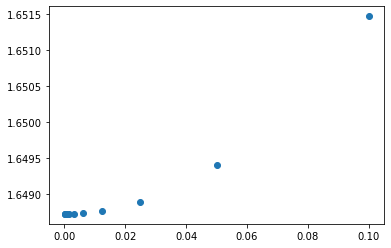

array([2.74924305e-03, 6.87053072e-04, 1.71747166e-04, 4.29357852e-05,
       1.07338834e-05, 2.68346695e-06, 6.70866521e-07, 1.67716643e-07,
       4.19292627e-08, 1.04823465e-08, 2.62147015e-09])

In [11]:
# Compute the centered difference approximation of  f
# yubowei 
# 04/13/2021
import numpy as np
import matplotlib.pyplot as plt
import pandas
f = lambda x: np.exp(x)
x_0 = 1/2 
h = np.array([0.1/2**n for n in range(0, 11)])
D_h = (f(x_0+h)-f(x_0-h))/(2*h)

error = abs(D_h-f(1/2))
# the derivative of exp(x) is still exp(x)
# now we can plot the error and check the rate of convergence.
plt.scatter(h,D_h)
plt.show()
error

Now in order to compute the rate of convergence, we simply need to compute the division of the errors and find the 
relationship with $1/2$.

In [15]:
rate1 = 6.87053072e-04/2.74924305e-03
rate2 = 1.71747166e-04/6.87053072e-04
print (rate1,rate2)

0.24990626856363246 0.24997656367367205


* It has a convergence linear trend at the rate of 2.

(b) Determine approximately the optimal value $h_{0}$ which gives the minimum total error (the sum of the discretization error plus the round-off error) and verify this numerically.


we know that 
$$
\frac{f\left(x_{0}+h\right)\left(1+\delta_{+}\right)-f\left(x_{0}-h\right)\left(1+\delta_{-}\right)}{2 h}=\frac{f\left(x_{0}+h\right)-f\left(x_{0}-h\right)}{2 h}+r_{h}
$$
where
$$
r_{h}=\frac{f\left(x_{0}+h\right) \delta_{+}-f\left(x_{0}-h\right) \delta_{-}}{2 h}
$$
$$
\left|r_{h}\right| \leq\left(\left|f\left(x_{0}+h\right)\right|+\left|f\left(x_{0}-h\right)\right|\right) \frac{e p s}{2 h} \approx\left|f\left(x_{0}\right)\right| \frac{\text { eps }}{h} .
$$
$$ h_{0}=\left(\frac{3 \text { eps }\left|f\left(x_{0}\right)\right|}{M_{3}}\right)^{\frac{1}{3}} \approx c \operatorname{eps}^{\frac{1}{3}} $$
now we can verify this numerically.

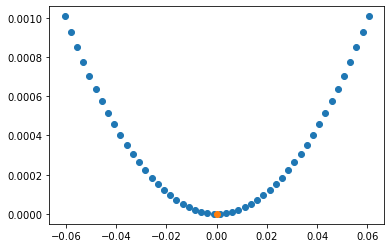

In [31]:
eps = 2**(-52) # machine precision
h = (eps)**(1/3)
X_h = np.linspace(h-h/0.0001, h+h/0.0001, 50)
D_h_opt = (f(x_0+X_h)-f(x_0-X_h))/(2*X_h)

error = abs(D_h_opt- np.exp(1/2))
plt.scatter(X_h, error,
           label = '(Error,$h$)')
plt.scatter(h,abs((f(x_0+h)-f(x_0-h))/(2*h)-np.exp(1/2)),
           label = '(Error,$h_{0}$)')
plt.show()
# it' s very clear that h = (eps)**(1/3) is the optimal

(c) Construct and compute a fourth order approximation to $f^{\prime}(1 / 2)$ by applying Richardson extrapolation to $D_{h}^{0} f(1 / 2)$. Verify the rate of convergence numerically. What is the optimal $h_{0}$ in this case?

$$D_{h}^{e x t} f\left(x_{0}\right):=\frac{4 D_{h / 2}^{0} f\left(x_{0}\right)-D_{h}^{0} f\left(x_{0}\right)}{3}=f^{\prime}\left(x_{0}\right)+\tilde{c}_{4} h^{4}+\cdots
$$

In [35]:
f = lambda x: np.exp(x)
x_0 = 1/2 
h = np.array([0.1/2**n for n in range(0, 11)])
D_h = (f(x_0+h)-f(x_0-h))/(2*h)
D_h2 = (f(x_0+h/2)-f(x_0-h/2))/(2*h/2)
S = (4*D_h2 - D_h)/3
error = abs(S-np.exp(1/2))
print(S)
print(error)

[1.64872093 1.64872125 1.64872127 1.64872127 1.64872127 1.64872127
 1.64872127 1.64872127 1.64872127 1.64872127 1.64872127]
[3.43585841e-07 2.14693214e-08 1.34175226e-09 8.38740188e-11
 5.19317922e-12 2.90434343e-13 1.75415238e-14 1.35891298e-13
 4.10782519e-14 1.17794663e-12 6.09512441e-13]


In [36]:
rate1 = 2.14693214e-08/3.43585841e-07
rate2 = 1.34175226e-09/2.14693214e-08
print(rate1,rate2)

0.062486048137239736 0.06249625849841719


It has a convergence linear trend at the rate of 4, and total error is bounded by: $$C h^{4}+\frac{\left|f\left(x_{0}\right)\right| \epsilon}{h}$$
thus,
$$
h_{0} \sim \epsilon^{1 / 5}
$$

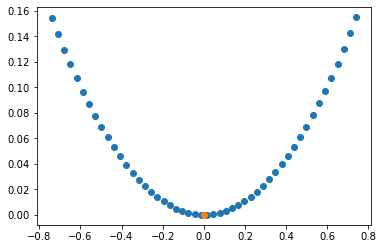

In [38]:
h = (eps)**(1/5)
X_h = np.linspace(h-h/0.001, h+h/0.001, 50)
D_h_opt = (f(x_0+X_h)-f(x_0-X_h))/(2*X_h)

error = abs(D_h_opt- np.exp(1/2))
plt.scatter(X_h, error,
           label = '(Error,$h$)')
plt.scatter(h,abs((f(x_0+h)-f(x_0-h))/(2*h)-np.exp(1/2)),
           label = '(Error,$h_{0}$)')
plt.show()
#Hence verified.